In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Assessment-2-Associate-DS(in).csv to Assessment-2-Associate-DS(in).csv
User uploaded file "Assessment-2-Associate-DS(in).csv" with length 26045 bytes


In [3]:
data = pd.read_csv('/content/Assessment-2-Associate-DS(in).csv')

In [4]:
data

,weekend_date,channel,brand,category,sub_category,SerailNum,quantity
0,4/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,56
1,11/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,122
2,18/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,102
3,25/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2/7/2022,Channel1,B1,Cat2,Sub-Cat2,1,97
...,...,...,...,...,...,...,...
595,24/08/2024,Channel2,B2,Cat3,Sub-Cat3,2,250
596,24/08/2024,Channel2,B2,Cat3,Sub-Cat3,4,775
597,31/08/2024,Channel2,B1,Cat3,Sub-Cat4,4,1189
598,31/08/2024,Channel2,B2,Cat3,Sub-Cat3,2,180


In [5]:
data = data.rename(columns={'SerailNum': 'serial_num', 'weekend_date': 'date'})

In [6]:
data.isna().sum()

,0
date,0
channel,0
brand,0
category,0
sub_category,0
serial_num,0
quantity,0


In [7]:
for i in data.columns:
  if data[i].nunique() <= 10:
    print(i)
    print(data[i].unique())
    print('----')

channel
['Channel1' 'Channel3' 'Channel2']
----
brand
['B1' 'B2']
----
category
['Cat2' 'Cat3' 'Cat1']
----
sub_category
['Sub-Cat2' 'Sub-Cat4' 'Sub-Cat1' 'Sub-Cat3']
----
serial_num
[1 3 5 2 4]
----


In [8]:
data[['channel', 'brand', 'category', 'sub_category', 'serial_num']].value_counts()

channel   brand  category  sub_category  serial_num
Channel1  B1     Cat2      Sub-Cat2      1             118
Channel2  B2     Cat3      Sub-Cat3      2             110
          B1     Cat1      Sub-Cat1      5             109
Channel3  B1     Cat3      Sub-Cat4      3             106
Channel2  B1     Cat3      Sub-Cat4      4              85
          B2     Cat3      Sub-Cat3      4              72
Name: count, dtype: int64

In [9]:
data.dtypes

,0
date,object
channel,object
brand,object
category,object
sub_category,object
serial_num,int64
quantity,int64


In [10]:
data.groupby('date').size()

,0
date,
1/10/2022,3
1/10/2022 0:00,1
1/4/2023,4
1/4/2023 0:00,1
1/6/2024,5
...,...
9/3/2024,5
9/3/2024 0:00,1
9/7/2022,2


In [11]:
data['date'] = pd.to_datetime(data['date'], format='mixed', dayfirst=True)

In [12]:
data = data.sort_values(by='date')
data.reset_index(drop=True, inplace=True)

In [13]:
grouped_data = data.groupby('date')['quantity'].sum().reset_index()

In [14]:
grouped_data

,date,quantity
0,2022-05-28,203
1,2022-06-04,254
2,2022-06-11,310
3,2022-06-18,321
4,2022-06-25,427
...,...,...
114,2024-08-03,1656
115,2024-08-10,1871
116,2024-08-17,1986
117,2024-08-24,2501


In [15]:
# to determine if there is any missing saturday in our dataset
start_date = grouped_data['date'].min()
end_date = grouped_data['date'].max()

expected_saturdays = pd.date_range(start=start_date, end=end_date, freq='W-SAT')
missing_saturdays = expected_saturdays.difference(data['date'])

len(missing_saturdays)

0

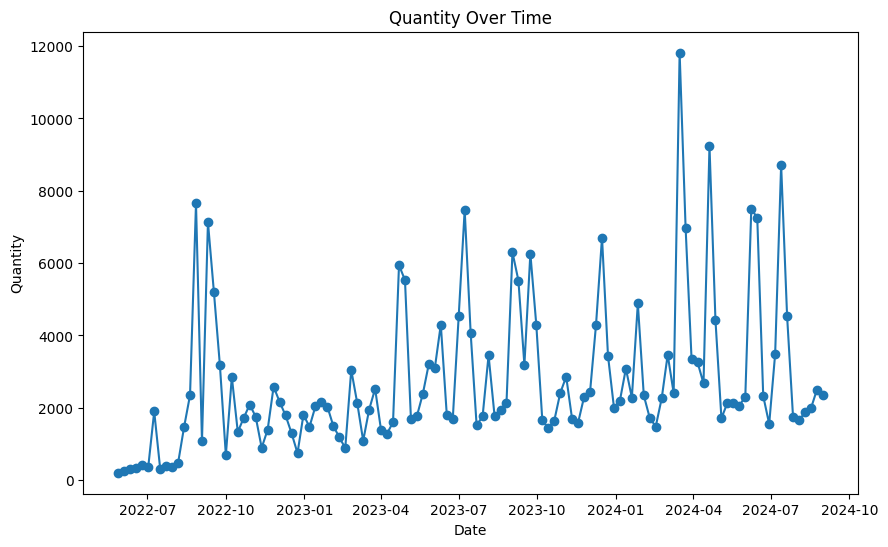

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['date'], grouped_data['quantity'], marker='o')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity Over Time')
plt.show()

In [17]:
grouped_data['year'] = grouped_data['date'].dt.year
grouped_data['month'] = grouped_data['date'].dt.month

In [18]:
grouped_data

,date,quantity,year,month
0,2022-05-28,203,2022,5
1,2022-06-04,254,2022,6
2,2022-06-11,310,2022,6
3,2022-06-18,321,2022,6
4,2022-06-25,427,2022,6
...,...,...,...,...
114,2024-08-03,1656,2024,8
115,2024-08-10,1871,2024,8
116,2024-08-17,1986,2024,8
117,2024-08-24,2501,2024,8


In [19]:
gd = grouped_data.groupby(['month', 'year'])['quantity'].sum().reset_index().sort_values(by=['year', 'month'])
gd['date'] = pd.to_datetime(gd[['year', 'month']].assign(day=1))
gd

,month,year,quantity,date
8,5,2022,203,2022-05-01
11,6,2022,1312,2022-06-01
14,7,2022,3343,2022-07-01
17,8,2022,11934,2022-08-01
20,9,2022,16579,2022-09-01
22,10,2022,8683,2022-10-01
24,11,2022,6616,2022-11-01
26,12,2022,7807,2022-12-01
0,1,2023,7687,2023-01-01
2,2,2023,6609,2023-02-01


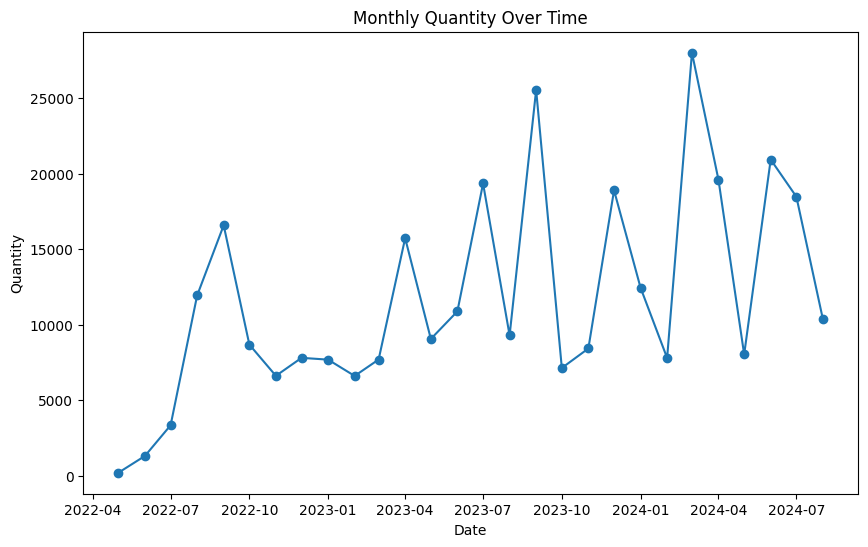

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(gd['date'], gd['quantity'], marker='o')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Monthly Quantity Over Time')
plt.show()

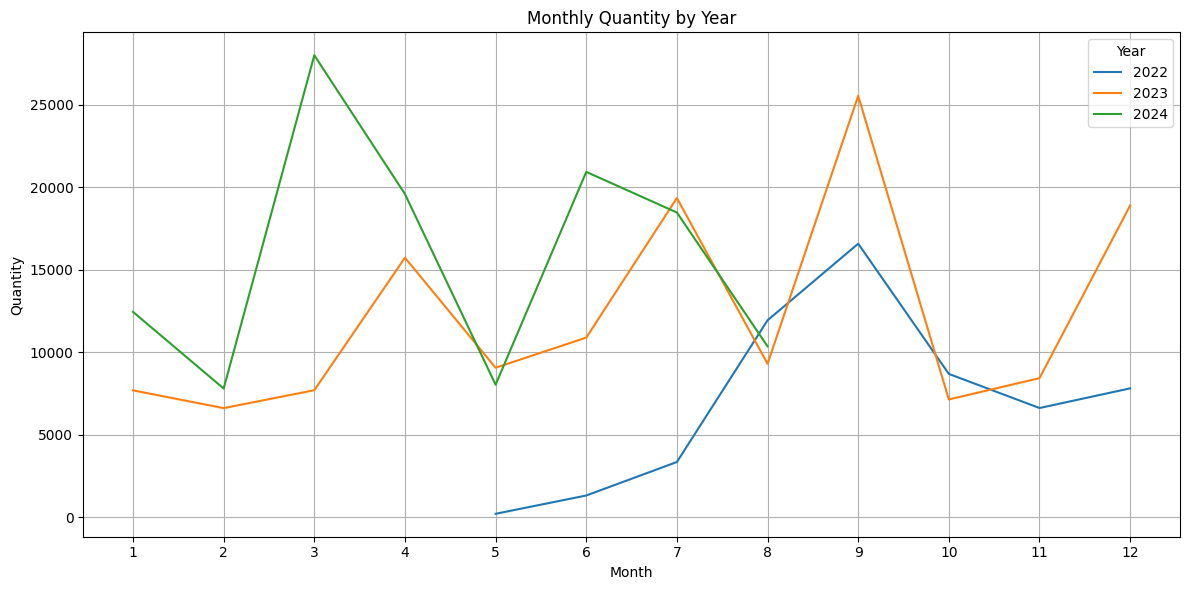

In [21]:
plt.figure(figsize=(12,6))

for year in gd['year'].unique():
    yearly_data = gd[gd['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['quantity'], label=str(year))

plt.title('Monthly Quantity by Year')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Year')
plt.xticks(range(1,13))  # Ensure months are shown from 1 to 12
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

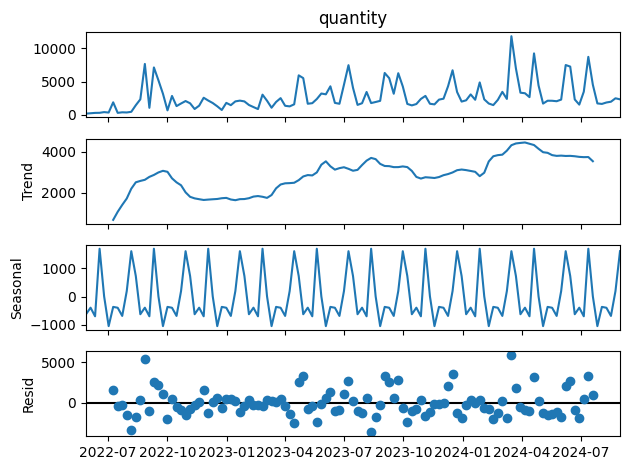

In [23]:
data = grouped_data.set_index('date')

decomposition = seasonal_decompose(data['quantity'], model='additive', period=12)

fig = decomposition.plot()
plt.show()